<img src='https://miro.medium.com/v2/resize:fit:1280/1*DJO9qUEWADxCHifLRTVGug.png'>

# About Dataset:
The "spam" dataset typically refers to a collection of text messages or emails that are labeled as either "spam" (unsolicited and often unwanted messages) or "ham" (legitimate messages). This dataset is commonly used for training and evaluating machine learning models for spam detection or text classification tasks. The dataset provides a labeled set of examples that helps algorithms learn to distinguish between spam and non-spam messages based on their content.

# Models employed:

### - Gaussian Naive Bayes (GaussianNB):
Gaussian Naive Bayes is a probabilistic classification algorithm that assumes the features to be normally distributed. It's particularly useful for continuous or numerical data. By modeling the data's distribution using Gaussian (normal) distribution, GaussianNB calculates the likelihood of a given class label based on the observed feature values, making it a simple yet effective choice for classification tasks involving continuous features.

### - Bernoulli Naive Bayes (BernoulliNB):
Bernoulli Naive Bayes is a variation of the Naive Bayes algorithm that's suitable for binary or boolean features, often representing presence or absence of certain attributes. It assumes that features are binary and computes probabilities based on how frequently each feature occurs for each class. BernoulliNB is often used in text classification tasks where features indicate the presence or absence of specific words in a document, resulting in a sparse binary matrix.

### - Multinomial Naive Bayes (MultinomialNB):
Multinomial Naive Bayes is designed for discrete data, typically in the form of count-based features like word frequencies in text data. It's a common choice for text classification, where features are often represented as counts or frequencies of words. MultinomialNB works by estimating the probability of observing a specific feature given a class label, and then combines these probabilities to determine the most likely class label for a given set of features.



# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Loading  and  Reading Dataset

In [2]:
dataset ='Spam.tsv'
df = pd.read_csv(dataset, sep = '\t')
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


# Exploring Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


# Cleaning Dataset

In [4]:
# Remove duplicates

def drop_dup(df):
    if df.duplicated().any() == True:
        print('The total duplicate row before removing duplicate:', df.duplicated().sum())
        df.drop_duplicates(inplace=True , keep = 'last')  # Remove duplicates
        df = df.reset_index(drop=True) #Reset the index
        print('The total duplicate row after removing duplicate:', df.duplicated().sum(), ' \nshape of dataset after removing duplicate columns :',df.shape)
    else:
        return 'No duplicate entries'
drop_dup(df)

The total duplicate row before removing duplicate: 403
The total duplicate row after removing duplicate: 0  
shape of dataset after removing duplicate columns : (5169, 4)


In [5]:
# length and punct not required for the analysis
#df = df.drop(['length', 'punct'], axis=1)

# Checking Imbalance

label
ham     4516
spam     653
Name: count, dtype: int64


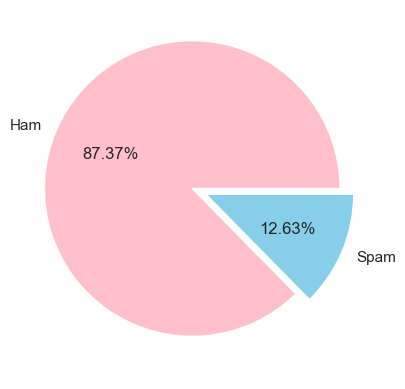

In [6]:
label_value_counts = df.label.value_counts()
print(label_value_counts)
labels = ['Ham', 'Spam']
colors =['pink','skyblue']
plt.pie(label_value_counts,autopct='%1.2f%%',labels = labels, colors=colors, explode=[0.1,0] )
plt.show()

# Treating Imbalance

In [7]:
ham = df[df.label =='ham']
spam =df[df.label =='spam']
print('Before Imbalance Treatment:')
print( 'ham  :', ham.shape,'\nspam :', spam.shape)
spam = spam.sample(ham.shape[0], replace = True)
print()
print('After Imbalance Treatment:')
print( 'ham  :', ham.shape,'\nspam :', spam.shape)

Before Imbalance Treatment:
ham  : (4516, 4) 
spam : (653, 4)

After Imbalance Treatment:
ham  : (4516, 4) 
spam : (4516, 4)


In [8]:
new_df = pd.concat([ham, spam], ignore_index=True)
new_df.label.value_counts()

label
ham     4516
spam    4516
Name: count, dtype: int64

# Encoding of label

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['label'] = le.fit_transform(new_df['label'])

In [10]:
new_df.label

0       0
1       0
2       0
3       0
4       0
       ..
9027    1
9028    1
9029    1
9030    1
9031    1
Name: label, Length: 9032, dtype: int32

# Text Preprocessing using NLTK (Natural Language Tool Kit)
### 1. Lowercase
### 2. Tokenization
### 3. Removing Special Character
### 4. Removing stop words and punctuation
### 5. stemming :
stemming algorithm reduces words to their root form, which often involves removing suffixes or prefixes. In this case, the code applies the Porter stemming algorithm to each word in the filtered_words list, creating a new list called stemmed_words containing the stemmed forms of the words.

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dilip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [13]:


corpus = []

# Loop through each message in the new_df['message']

for i in range(0, len(new_df)):
    text = new_df['message'][i]
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters 
    cleantext = cleaned_text.lower()  # Convert to lowercase
    words = cleantext.split()  # selecting words
    stop_words = set(stopwords.words('english')) # unique stopwords
    filtered_words = [word for word in words if word not in stop_words]  # Remove stopwords using NLTK's English stopwords list
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in filtered_words]  # root form ( removing suffixes or prefixes)
    processed_text = ' '.join(stemmed_words)  # Join the words back into a sentence
    corpus.append(processed_text)  # Add the processed review to the corpus list

In [14]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb spell name ye v naughti make v wet',
 'fine way u feel way gota b',
 'serious spell name',
 'go tri month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love',
 'back amp pack car let know room',
 'ahhh work vagu rememb feel like lol',
 'wait still clear sure sarcast x want live us',

In [15]:
new_df['processed_text'] = corpus
new_df

,label,message,length,punct,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,0,U dun say so early hor... U c already then say...,49,6,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think goe usf live around though
4,0,Even my brother is not like to speak with me. ...,77,2,even brother like speak treat like aid patent
...,...,...,...,...,...
9027,1,Well done ENGLAND! Get the official poly ringt...,155,6,well done england get offici poli rington colo...
9028,1,Promotion Number: 8714714 - UR awarded a City ...,177,7,promot number ur award citi break could win su...
9029,1,Ur cash-balance is currently 500 pounds - to m...,148,9,ur cash balanc current pound maxim ur cash sen...
9030,1,For ur chance to win £250 cash every wk TXT: P...,121,11,ur chanc win cash everi wk txt play c www musi...


In [16]:
from wordcloud import WordCloud
wc = WordCloud(width=800,
               height=400,
               min_font_size=2,
               #max_font_size=100,
               min_word_length=3,
               max_words=100,               
               background_color='white'
              )


In [17]:
wc_ham = wc.generate(new_df[new_df['label']==0]['processed_text'].str.cat(sep = " "))



# Words in ham messages

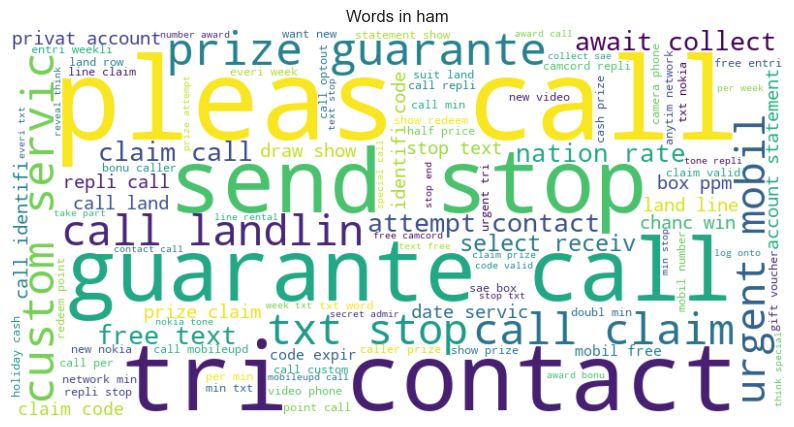

In [18]:
plt.figure(figsize=(10, 6))
plt.imshow(wc_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Words in ham')
plt.show()

# Words in spam messages

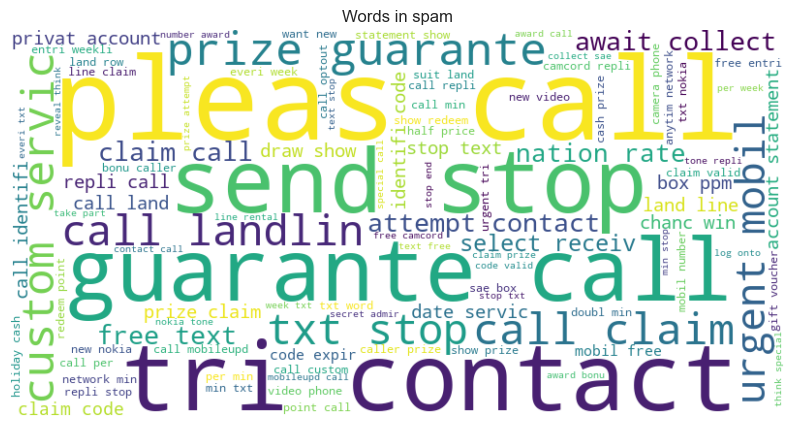

In [19]:

wc_spam = wc.generate(new_df[new_df['label']==1]['processed_text'].str.cat(sep = " "))
plt.figure(figsize=(10, 6))
plt.imshow(wc_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Words in spam')
plt.show()

# Model Building

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve , auc


In [21]:
## First of all We have to Convert Our SMS text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
feature = cv.fit_transform(new_df['processed_text']).toarray()

In [22]:
feature.shape

(9032, 6296)

In [23]:
feature

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
new_df

,label,message,length,punct,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,9,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,0,U dun say so early hor... U c already then say...,49,6,u dun say earli hor u c alreadi say
3,0,"Nah I don't think he goes to usf, he lives aro...",61,2,nah think goe usf live around though
4,0,Even my brother is not like to speak with me. ...,77,2,even brother like speak treat like aid patent
...,...,...,...,...,...
9027,1,Well done ENGLAND! Get the official poly ringt...,155,6,well done england get offici poli rington colo...
9028,1,Promotion Number: 8714714 - UR awarded a City ...,177,7,promot number ur award citi break could win su...
9029,1,Ur cash-balance is currently 500 pounds - to m...,148,9,ur cash balanc current pound maxim ur cash sen...
9030,1,For ur chance to win £250 cash every wk TXT: P...,121,11,ur chanc win cash everi wk txt play c www musi...


# splitting the target and feature

In [25]:
x=feature
y= new_df['label']

# Splitting into train and test:

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 123, stratify= y)

## Models

In [27]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
models = [('GaussianNB',gnb), 
           ('BernoulliNB', bnb), 
           ('MultinomialNB', mnb), 
        ]


from tabulate import tabulate
print(tabulate(models, headers=['Model name', 'Sklearn models']),)

Model name     Sklearn models
-------------  ----------------
GaussianNB     GaussianNB()
BernoulliNB    BernoulliNB()
MultinomialNB  MultinomialNB()


In [28]:

for model_name, model in models:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    print('==='*10)
    print(model_name)
    print('==='*10)
#=======================================================
#            Cross Validation
#--------------------------------------------------------
    CV_train_acc =(cross_val_score(model, x_train, y_train, cv =10).mean()).round(2)*100
    CV_test_acc =(cross_val_score(model, x_test, y_test, cv =10).mean()).round(2)*100

    print(f'▬ Training Accuracy(CrossValidation), {CV_train_acc} %' )
    print(f'▬ TestAccuracy(CrossValidation), {CV_test_acc} %' )
    variance_CV = abs(CV_train_acc - CV_test_acc).round(2)

    print(f'Variance (CrossValidation) : {variance_CV}')
    if (variance_CV > 9) or (CV_train_acc > 99):
        print(f'ATTENTION : The  {model_name} Model is overfitting')



        print()

GaussianNB
▬ Training Accuracy(CrossValidation), 92.0 %
▬ TestAccuracy(CrossValidation), 89.0 %
Variance (CrossValidation) : 3.0
BernoulliNB
▬ Training Accuracy(CrossValidation), 98.0 %
▬ TestAccuracy(CrossValidation), 97.0 %
Variance (CrossValidation) : 1.0
MultinomialNB
▬ Training Accuracy(CrossValidation), 98.0 %
▬ TestAccuracy(CrossValidation), 96.0 %
Variance (CrossValidation) : 2.0


## ROC-AUC charecteristics

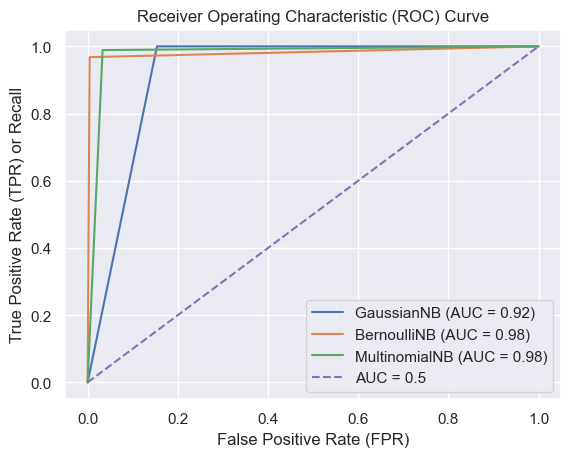

In [29]:
for model_name, model in models:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line representing a random classifier (AUC = 0.5)

plt.plot([0, 1], [0, 1], 'm--', label='AUC = 0.5')

# Set labels and title

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) or Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

CV_acc =[]
ROC_AUC =[]
Precision=[]
Recall =[]
F1_score= []
for model_name, model in models:
    model.fit(x_train,y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    CV_acc.append((cross_val_score(model, x_test, y_test, cv =10).mean()).round(2))
    Precision.append(precision_score(y_test,y_pred_test))
    Recall.append(recall_score(y_test,y_pred_test))
    F1_score.append(f1_score(y_test,y_pred_test))
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    ROC_AUC.append(auc(fpr, tpr))


In [31]:
metric ={ 'Test_Acc_CV' :CV_acc, 'Precision': Precision, 'Recall': Recall, 'F1_score' :F1_score}
row_label = [i[0] for i in models]
metric_df =pd.DataFrame(metric, index =row_label)
metric_df

,Test_Acc_CV,Precision,Recall,F1_score
GaussianNB,0.89,0.866603,1.000000,0.928535
BernoulliNB,0.97,0.995444,0.967885,0.981471
MultinomialNB,0.96,0.967497,0.988926,0.978094


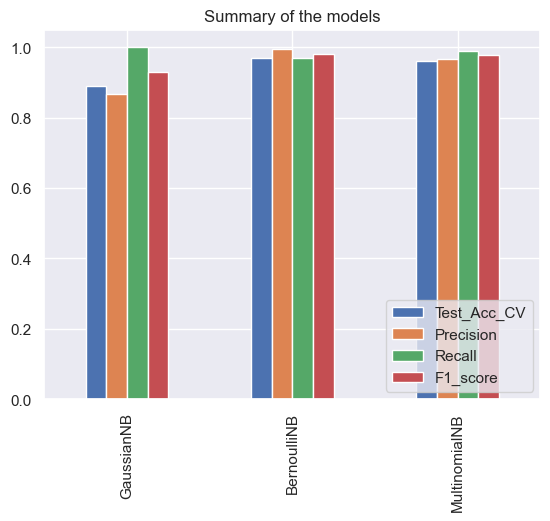

In [32]:
metric_df.plot(kind='bar')
plt.title('Summary of the models')
plt.legend(loc= 'lower right')

In summary, the analysis shows that BernoulliNB achieved the highest accuracy among the three classifiers, along with excellent precision and a balanced F1-score. This model excelled at accurately classifying spam while minimizing false positives. MultinomialNB also delivered strong results, striking a balance between precision and recall. GaussianNB demonstrated perfect recall but with slightly lower precision, potentially indicating it might be more cautious in labeling messages as spam.

It's worth noting that the choice of classifier depends on the specific use case and priorities. For instance, if minimizing false positives (legitimate messages classified as spam) is crucial, BernoulliNB's high precision might be preferred. On the other hand, a balance between precision and recall, as seen in MultinomialNB, might be more appropriate for certain scenarios.